## Archivo jupyter del grupo B con minning, wrangling y cleaning de la media de muertes diarias y generación del json @CristiDatas

In [1]:

# Importamos bibliotecas

import numpy as np
import pandas as pd
import json


In [2]:
# Guardamos la url para poder actualizar (yo creo que lo más fácil es manejar el csv y luego convertimos)

url="https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
# Convertimos el csv en dataframe df

df=pd.read_csv(url)
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33622,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33623,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33624,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33625,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cambiamos el índice a "iso_code" para facilitar la selección de países

df=df.set_index("iso_code")
df

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Seleccionamos los países que queremos para nuestro df

df=df.loc[["IND","PER","USA","FRA","ESP"],:]
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
iso_code,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [6]:
# Cambiamos los valores Nan por ceros

h=df.pivot_table('new_deaths', index='date',columns='location')
h=h.fillna(0)
h

location,France,India,Peru,Spain,United States
date,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-07-26,0.0,705.0,187.0,0.0,914.0
2020-07-27,0.0,708.0,199.0,2.0,475.0
2020-07-28,17.0,654.0,189.0,2.0,1076.0


In [7]:
# El 27 de abril detectamos un outlier en España. La cifra que aparece es de 0, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y la cifra ese día fue de 331. La cambiamos.

h.loc['2020-04-27'][3]=331

In [8]:
# El 22 de mayo detectamos un outlier en España. La cifra que aparece es de 688, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y la cifra ese día fue de 56. La cambiamos.

h.loc['2020-05-22'][3]=56

In [9]:
# El 25 de mayo detectamos otro outlier en España. La cifra que aparece es de -1918, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y ese día no se facilitó cifra concreta sino que se dio como dato la de los fallecidos en los últimos 7 días, que fue 50, entendemos que era la tendencia. La cambiamos.

h.loc['2020-05-25'][3]=50

In [10]:
# Añadimos una columna con la media de los países por día.

h["d_averages"]=h.mean(axis=1)
h


location,France,India,Peru,Spain,United States,d_averages
date,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-07-26,0.0,705.0,187.0,0.0,914.0,361.2
2020-07-27,0.0,708.0,199.0,2.0,475.0,276.8
2020-07-28,17.0,654.0,189.0,2.0,1076.0,387.6


In [11]:
h.loc['2020-05-01':'2020-06-01']

location,France,India,Peru,Spain,United States,d_averages
date,,,,,,
2020-05-01,289.0,73.0,108.0,281.0,2040.0,558.2
2020-05-02,218.0,71.0,73.0,276.0,2062.0,540.0
2020-05-03,166.0,83.0,76.0,164.0,1317.0,361.2
2020-05-04,135.0,72.0,86.0,164.0,1297.0,350.8
2020-05-05,306.0,195.0,58.0,185.0,1252.0,399.2
2020-05-06,330.0,126.0,100.0,244.0,2144.0,588.8
2020-05-07,278.0,89.0,89.0,213.0,2353.0,604.4
2020-05-08,178.0,103.0,94.0,181.0,2239.0,559.0
2020-05-09,243.0,95.0,87.0,227.0,1510.0,432.4


In [12]:
h.loc['2020-05-01':'2020-06-01'].max()

location
France            351.0
India             265.0
Peru              195.0
Spain             283.0
United States    2353.0
d_averages        604.4
dtype: float64

In [13]:
# El 26 de mayo detectamos otro outlier en España. La cifra que aparece es 283. El Ministerio de Sanidad dijo que en realidad habían 35 nuevos muertos pero daban esta cifra para hacer un "ajuste". Lo dejamos así.

# h.loc['2020-05-26'][3]=35

In [14]:
# Sacamos la serie

h=h["d_averages"]


In [15]:
# Convertimos la serie en dataframe

h=h.to_frame()
h

,d_averages
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-07-26,361.2
2020-07-27,276.8
2020-07-28,387.6


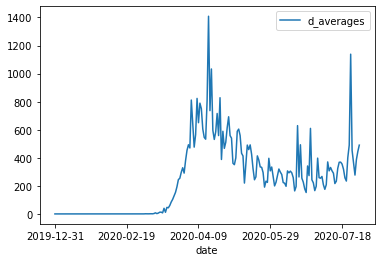

In [50]:
h.plot()

In [55]:
# 
s=h.to_dict()

In [56]:
data = json.dumps(s)
with open("api\d_averages.json","w+") as f:
  f.write(data)

In [24]:
# Y convertimos el dataframe en json

# h.to_json('d_averages.json')

In [18]:
# para leerlo y graficar: pd.read_json("d_averages.json")

In [53]:
# pd.read_json("api\d_averages.json")

,d_averages
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-07-26,361.2
2020-07-27,276.8
2020-07-28,387.6
2020-07-29,445.2
